LOAN-DEFAULT-APPROVAL ANALYSIS:

Import Libraries:

In [68]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset:

In [69]:
#Load dataset with pandas
df=pd.read_csv("Loan_default.csv")
#check first 3 rows of dataset
df.head(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


Summary About DataSet:

1. LoanID: Unique identifier for each loan application
2. Age: Borrower's age in years
3. Income: Borrower's monthly income
4. LoanAmount: Amount borrowed (e.g., $10,000)
5. CreditScore: Borrower's credit score (e.g., 700)
6. MonthsEmployed: Number of months employed at current job
7. NumCreditLines: Number of credit lines (e.g., credit cards, loans)
8. InterestRate: Loan interest rate (e.g., 5%)
9. LoanTerm: Loan term in months (e.g., 60 months)
10. DTIRatio: Debt-to-income ratio (e.g., 30%)
11. Education: Borrower's education level (e.g., high school, college)
12. EmploymentType: Type of employment (e.g., full-time, part-time, self-employed)
13. MaritalStatus: Marital status (e.g., single, married, divorced)
14. HasMortgage: Has a mortgage (yes/no)
15. HasDependents: Has dependents (e.g., children, yes/no)
16. LoanPurpose: Purpose of the loan (e.g., car, home improvement, debt consolidation)
17. HasCoSigner: Has a co-signer (yes/no)
18. Default: Did the borrower default on the loan (yes/no)

This dataset provides a comprehensive view of the borrower's financial situation, credit history, and personal information, which can be used to assess loan eligibility and risk.

Data Accessing:

In [70]:
#first 10 rows
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [71]:
#last 10 rows
df.tail(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255337,DSL4O0KAWD,64,73743,140354,300,0,2,4.12,12,0.24,PhD,Self-employed,Single,Yes,No,Education,Yes,0
255338,6V8S5IUS63,68,21711,168231,352,78,2,9.71,60,0.36,PhD,Full-time,Divorced,Yes,Yes,Home,No,0
255339,O6SWO6CBGB,51,69492,122962,348,66,2,10.83,48,0.27,High School,Part-time,Divorced,No,No,Home,No,0
255340,48LOOK4VR1,41,61809,119238,444,34,2,19.99,36,0.31,Master's,Part-time,Married,Yes,Yes,Auto,Yes,0
255341,AKXAXQN7PG,40,129890,116119,701,38,3,9.91,24,0.23,High School,Part-time,Divorced,Yes,No,Home,Yes,1
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [72]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [73]:
#shape of the dataset (number of rows & number of columns)
df.shape

(255347, 18)

In [74]:
#to check duplicates in dataset
df.duplicated().sum()

0

In [75]:
#describe the dataset
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


Create New Features

In [76]:
df['IncomePerCreditLine'] = df['Income'] / df['NumCreditLines']
df['LoanAmountToIncome'] = df['LoanAmount'] / df['Income']

Data Cleaning:

In [77]:
#to check that can we have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanID               255347 non-null  object 
 1   Age                  255347 non-null  int64  
 2   Income               255347 non-null  int64  
 3   LoanAmount           255347 non-null  int64  
 4   CreditScore          255347 non-null  int64  
 5   MonthsEmployed       255347 non-null  int64  
 6   NumCreditLines       255347 non-null  int64  
 7   InterestRate         255347 non-null  float64
 8   LoanTerm             255347 non-null  int64  
 9   DTIRatio             255347 non-null  float64
 10  Education            255347 non-null  object 
 11  EmploymentType       255347 non-null  object 
 12  MaritalStatus        255347 non-null  object 
 13  HasMortgage          255347 non-null  object 
 14  HasDependents        255347 non-null  object 
 15  LoanPurpose      

To find outliers in dataset:

In [78]:
print(df.isnull().sum())
print(df.dtypes())

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))].copy()

LoanID                 0
Age                    0
Income                 0
LoanAmount             0
CreditScore            0
MonthsEmployed         0
NumCreditLines         0
InterestRate           0
LoanTerm               0
DTIRatio               0
Education              0
EmploymentType         0
MaritalStatus          0
HasMortgage            0
HasDependents          0
LoanPurpose            0
HasCoSigner            0
Default                0
IncomePerCreditLine    0
LoanAmountToIncome     0
dtype: int64


TypeError: 'Series' object is not callable

EDA:

1. Credit Score Analysis:

Average CreditScore by loan defaut

In [ ]:
#apply groupby on Default and then find average on creditscore by loan default
series=df.groupby('Default')['CreditScore'].mean()
series

-0.03416649376077059

Credit Score Distribution by Loan Status

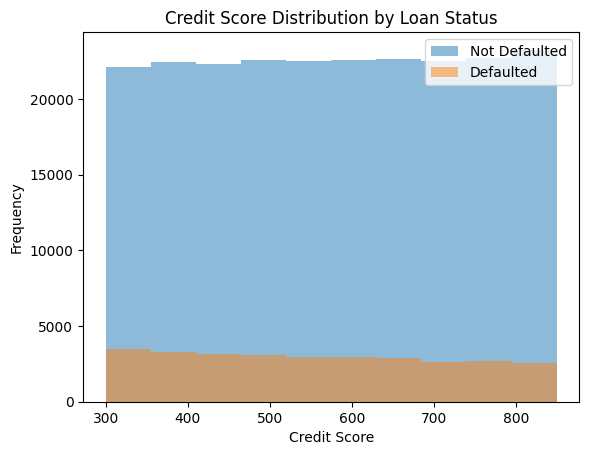

In [ ]:
#find deafulted and not-defaulted and then make histogram for this.
not_defaulted = df[df['Default'] == 0]
defaulted = df[df['Default'] == 1]

plt.hist(not_defaulted['CreditScore'], alpha=0.5, label='Not Defaulted')
plt.hist(defaulted['CreditScore'], alpha=0.5, label='Defaulted')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution by Loan Status')
plt.legend()
plt.show()

Correlation b/w CreditScore and LoanAmount

In [ ]:
#find relationship b/w loanamount and creditscore using corr().
df['LoanAmount'].corr(df['CreditScore'])

0.0012612695708441423

So, there is a negative relation between CreditScore and Default Because correlation is negative.

2. Loan amount Analysis:

Average LoanAmount by LoanPurpose 

In [ ]:
#apply groupny on LoanPurpose and then find averaage of LoanAmount.
df.groupby('LoanPurpose')['LoanAmount'].mean()

LoanPurpose
Auto         127857.908721
Business     127141.807458
Education    127645.822841
Home         127622.382853
Other        127629.648054
Name: LoanAmount, dtype: float64

Correlation b/w LoanAmount and CreditScore.

In [ ]:
df['LoanAmount'].corr(df['CreditScore'])

0.0012612695708441423

3. Default Risk Analysis

Probability of Default by CreditScore range

In [ ]:
credit_score_ranges = [300, 550, 650, 750, 850]
df["CreditScoreRange"] = pd.cut(df["CreditScore"], credit_score_ranges)

# Calculate the default rate (DR) for each credit score range
default_rates = df.groupby("CreditScoreRange")["Default"].mean()

# Estimate the probability of default (PD) for each credit score range
pd = default_rates / (1 + default_rates)

# Print the results
print(pd)


CreditScoreRange
(300, 550]    0.111666
(550, 650]    0.103157
(650, 750]    0.097560
(750, 850]    0.091477
Name: Default, dtype: float64


C:\Users\Syed Ali Zar\AppData\Local\Temp\ipykernel_15448\3557117095.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby("CreditScoreRange")["Default"].mean()


Correlation b/w Default and Income.

In [ ]:
df['Default'].corr(df['Income'])

-0.0991194844566038

4. Demographic Analysis

Average loanAmount by AgeGroup

In [ ]:
#apply groupby on age then find average og loanamount.
df.groupby(['Age'])['LoanAmount'].mean()

Age
18    126052.451269
19    127285.536369
20    128264.861757
21    126784.688689
22    128936.437022
23    126750.992827
24    128792.044568
25    127477.341529
26    130540.566346
27    127420.550455
28    128120.925601
29    127525.525385
30    127204.211950
31    127132.640179
32    127859.638559
33    127833.526882
34    127686.808502
35    127349.626890
36    128042.615980
37    128752.164127
38    127931.872048
39    127601.387895
40    127456.388845
41    126839.748079
42    127452.512180
43    128300.257402
44    126342.322055
45    128254.936610
46    129504.235523
47    127268.714865
48    126861.176299
49    126516.305937
50    127314.482724
51    128060.288556
52    127197.060447
53    128225.793812
54    129198.055273
55    127510.983610
56    127206.878009
57    127311.311878
58    124799.593692
59    127489.204270
60    127544.144593
61    127038.609595
62    125891.803161
63    127799.201974
64    125865.014669
65    128402.229759
66    128483.719066
67    128161.886

Average Credit Score by Education Level

In [ ]:
#apply groupby on education and then find average of creditscore.
series=df.groupby('Education')['CreditScore'].mean()
series

Education
Bachelor's     574.094227
High School    574.812419
Master's       573.525802
PhD            574.624046
Name: CreditScore, dtype: float64

Distribution of LoanPurposes

Text(0, 0.5, 'Frequency')

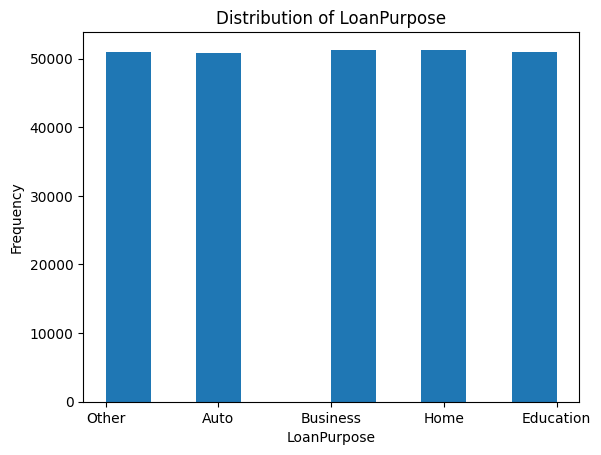

In [ ]:
plt.hist(df['LoanPurpose'])
plt.title("Distribution of LoanPurpose")
plt.xlabel("LoanPurpose")
plt.ylabel("Frequency")

5. Loan Term Analysis

Average Loan Term by LoanPurpose

In [ ]:
#apply groupby on loanpurpose and then find average of loanterm.
df.groupby('LoanPurpose')['LoanTerm'].mean()


LoanPurpose
Auto         36.004248
Business     35.923272
Education    36.057877
Home         36.015209
Other        36.129630
Name: LoanTerm, dtype: float64

Correlation b/w LoanTerm and Interest rate.

In [ ]:
df['LoanTerm'].corr(df['InterestRate'])

0.0008920080387873238

Distribution of LoanTerm

Text(0, 0.5, 'Frequency')

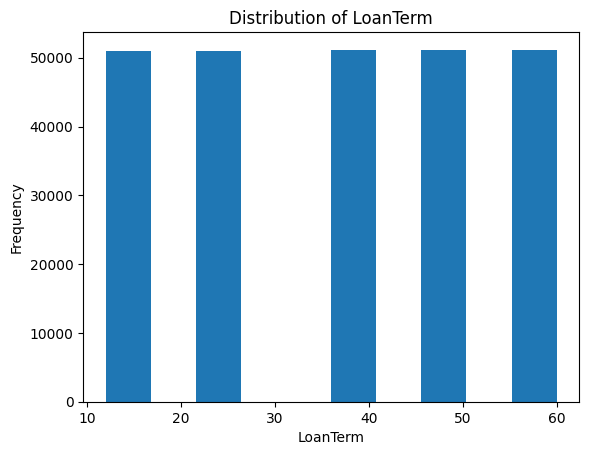

In [ ]:
plt.hist(df['LoanTerm'])
plt.title("Distribution of LoanTerm")
plt.xlabel("LoanTerm")
plt.ylabel("Frequency")

6. Interest Rate Analysis

Average Interest Rate by LoanTerm

In [ ]:
#apply groupby on loanterm and find average of loanterm.
df.groupby('LoanTerm')['InterestRate'].mean()

LoanTerm
12    13.500817
24    13.482212
36    13.463228
48    13.509511
60    13.508043
Name: InterestRate, dtype: float64

Correlation between CreditScore and InterestRate.

In [ ]:
df['InterestRate'].corr(df['CreditScore'])

0.0004361386910160298

Distributions of InterestRate by LoanPurpose

In [ ]:
interest_rate_dist = df.groupby("LoanPurpose")["InterestRate"].describe()

# Print the results
print(interest_rate_dist)

               count       mean       std  min   25%    50%    75%   max
LoanPurpose                                                             
Auto         50844.0  13.467197  6.634673  2.0  7.74  13.42  19.23  25.0
Business     51298.0  13.479148  6.619131  2.0  7.77  13.48  19.18  25.0
Education    51005.0  13.512605  6.636230  2.0  7.82  13.48  19.28  25.0
Home         51286.0  13.526931  6.650287  2.0  7.76  13.49  19.32  25.0
Other        50914.0  13.477769  6.641943  2.0  7.76  13.42  19.25  25.0


7. Co-Signer Analysis

ValueCounts of Default by coSinger
Valuecounts of CoSigner byDefault

In [ ]:
#apply groupby on default and the apply valuecounts on HasCoSinger
s1=df.groupby('Default')['HasCoSigner'].value_counts()
#apply groupby on HasCoSinger and then apply valuecounts on Default
s2=df.groupby('HasCoSigner')['Default'].value_counts()
s1,s2

(Default  HasCoSigner
 0        Yes            114471
          No             111223
 1        No              16423
          Yes             13230
 Name: count, dtype: int64,
 HasCoSigner  Default
 No           0          111223
              1           16423
 Yes          0          114471
              1           13230
 Name: count, dtype: int64)

Average LoanAmount with cosingers by credit score range.

In [ ]:
# Bin the credit scores into ranges
credit_score_ranges = [300, 550, 650, 750, 850]
df["CreditScoreRange"] = pd.cut(df["CreditScore"], credit_score_ranges)

# Filter loans with cosigners
df_with_cosigners = df[df["HasCoSigner"] == 'Yes']

# Group by credit score range and calculate average loan amount
avg_loan_amount = df_with_cosigners.groupby("CreditScoreRange")["LoanAmount"].mean()

# Print the results
print(avg_loan_amount)

CreditScoreRange
(300, 550]    127259.972221
(550, 650]    127801.616755
(650, 750]    127552.870245
(750, 850]    127415.960923
Name: LoanAmount, dtype: float64


C:\Users\Syed Ali Zar\AppData\Local\Temp\ipykernel_15448\790564358.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_loan_amount = df_with_cosigners.groupby("CreditScoreRange")["LoanAmount"].mean()


Data Visualization:

Bar chart: Show the top 5 loan purposes by count.

Text(0, 0.5, 'Frequency')

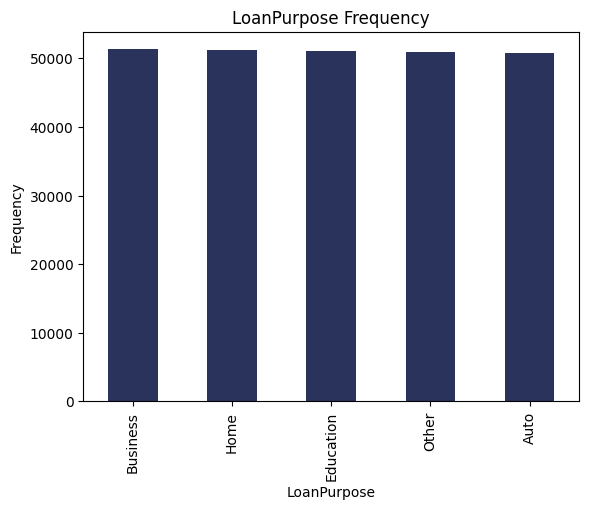

In [ ]:
df['LoanPurpose'].value_counts().head(5).plot(kind='bar',color='#29335C')
plt.title("LoanPurpose Frequency")
plt.xlabel('LoanPurpose')
plt.ylabel("Frequency")

Histogram: Visualize the distribution of credit scores.

Text(0.5, 0, 'CreditScore')

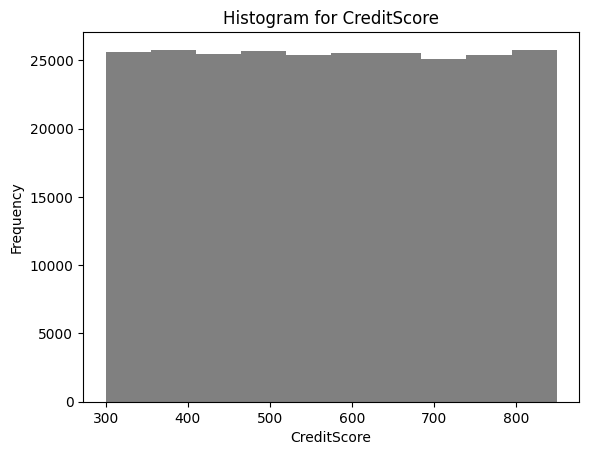

In [ ]:
df['CreditScore'].plot(kind='hist', color='grey')
plt.title("Histogram for CreditScore")
plt.xlabel('CreditScore')

Pie chart: Display the proportion of loans by employment type using

<Axes: ylabel='count'>

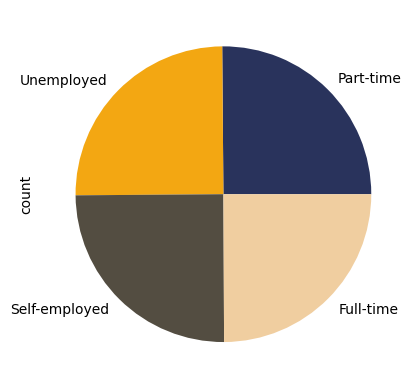

In [ ]:
df['EmploymentType'].value_counts().plot(kind='pie',colors=['#29335C','#F3A712','#534D41','#F0CEA0'])


Piechart: Show the proportion of loans by marital status.

<Axes: ylabel='count'>

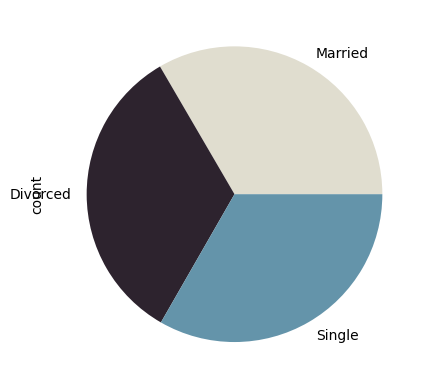

In [ ]:
df['MaritalStatus'].value_counts().plot(kind='pie',colors=['#E0DDCF','#2D232E','#6494AA'])

Box plot: Compare loan amounts by education level. 

<Axes: title={'center': 'LoanAmount'}, xlabel='Education'>

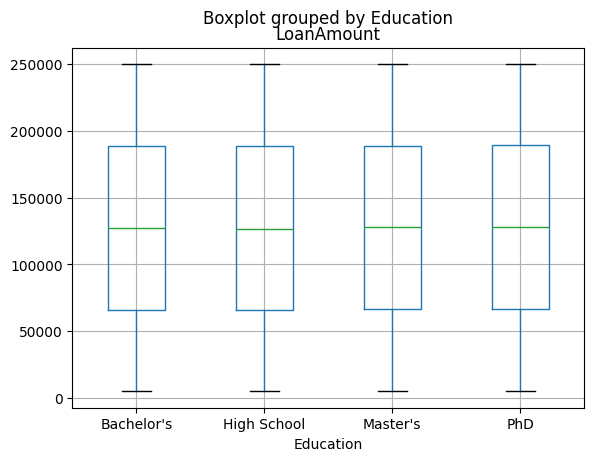

In [ ]:
df.boxplot(column='LoanAmount', by='Education')

Count of Categorical Columns

<Axes: xlabel='LoanPurpose'>

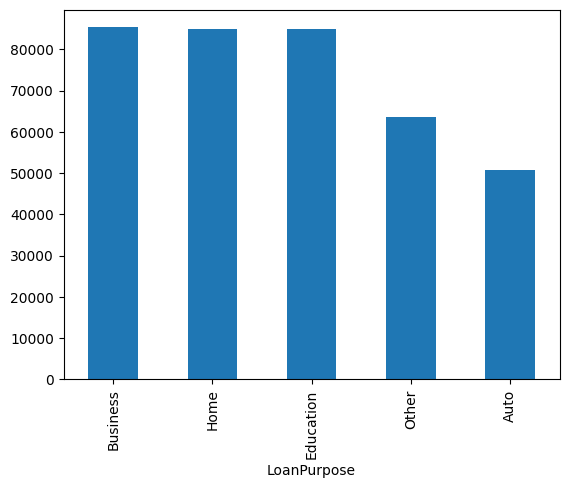

In [ ]:
df['Education'].value_counts().plot(kind='bar',color='#112A46')
df['EmploymentType'].value_counts().plot(kind='bar')
df['MaritalStatus'].value_counts().plot(kind='bar')
df['LoanPurpose'].value_counts().plot(kind='bar')


BoxPlots

<Axes: xlabel='MaritalStatus', ylabel='LoanAmount'>

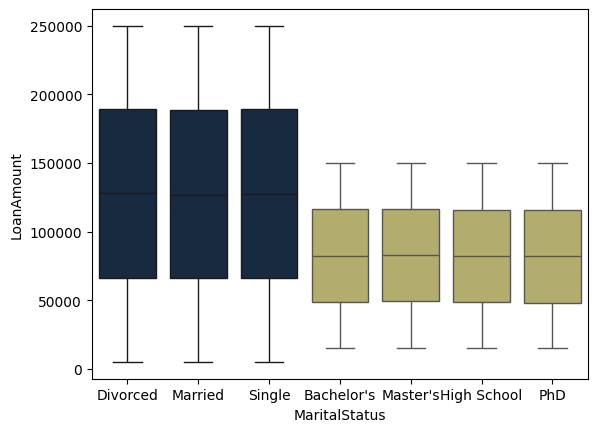

In [ ]:
sns.boxplot(x='MaritalStatus', y='LoanAmount', data=df,color='#112A46')
sns.boxplot(x='Education', y='Income', data=df,color='#BEB760')

PairPlot

In [ ]:
sns.pairplot(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'Default']], hue='Default', palette='coolwarm')


Hypothesis Testing

Hypothesis 1, we can use an independent samples t-test to compare the mean Income between the default and non-default groups.

In [ ]:
# Hypothesis 1: Income and Default status
import scipy.stats as stats

# Separate the data into two groups: Default and No Default
default_group = df[df['Default'] == 1]['Income']
no_default_group = df[df['Default'] == 0]['Income']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(default_group, no_default_group)

print("Hypothesis 1: Income and Default Status")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the Null Hypothesis: There is a significant difference in Income between the two groups.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in Income between the two groups.")


Hypothesis 1: Income and Default Status
T-statistic: -50.33460480989034, P-value: 0.0
Reject the Null Hypothesis: There is a significant difference in Income between the two groups.


 Hypothesis 2, we can use an independent samples t-test to compare the mean Credit Score between the default and non-default groups.

In [ ]:
# Hypothesis 2: Credit Score and Default status

# Separate the data into two groups: Default and No Default
default_group = df[df['Default'] == 1]['CreditScore']
no_default_group = df[df['Default'] == 0]['CreditScore']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(default_group, no_default_group)

print("\nHypothesis 2: Credit Score and Default Status")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the Null Hypothesis: There is a significant difference in Credit Score between the two groups.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in Credit Score between the two groups.")


Hypothesis 2: Credit Score and Default Status
T-statistic: -17.274986899493303, P-value: 7.924421711089239e-67
Reject the Null Hypothesis: There is a significant difference in Credit Score between the two groups.


 Advanced Analysis:

Apply 2 ML models on Dataset.

Define x & y input 7 output.

In [ ]:
df.dropna()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
#x is inputs
x=df.iloc[:,:-1].values
#y is outputs
y=df.iloc[:,-1].values
x,y



(array([['I38PQUQS96', 56, 85994, ..., 'Yes', 'Other', 'Yes'],
        ['HPSK72WA7R', 69, 50432, ..., 'No', 'Other', 'Yes'],
        ['C1OZ6DPJ8Y', 46, 84208, ..., 'Yes', 'Auto', 'No'],
        ...,
        ['XQK1UUUNGP', 56, 84820, ..., 'Yes', 'Auto', 'Yes'],
        ['JAO28CPL4H', 42, 85109, ..., 'Yes', 'Other', 'No'],
        ['ZTH91CGL0B', 62, 22418, ..., 'No', 'Education', 'Yes']],
       dtype=object),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64))

Filling Missing Values using scikit-leran library.

In [ ]:
#import SimplrImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
#apple mean on missing values on numeric values
imputer = imputer.fit(x[:,1:10])
x[:,1:10]= imputer.transform(x[:,1:10])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
#apple most frequent on missing values on alphabetic values
imputer = imputer.fit(x[:,10:17])
x[:,10:17]= imputer.transform(x[:,10:17])

Apply One hot encoding or Label Coding

In [ ]:
#import  labelencoding
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()

#apply on columns which has categorical values
x[:,0] = labelEncoder_X.fit_transform(x[:,0])
x[:,10] = labelEncoder_X.fit_transform(x[:,10])
x[:,11] = labelEncoder_X.fit_transform(x[:,11])
x[:,12] = labelEncoder_X.fit_transform(x[:,12])
x[:,13] = labelEncoder_X.fit_transform(x[:,13])
x[:,14] = labelEncoder_X.fit_transform(x[:,14])
x[:,15] = labelEncoder_X.fit_transform(x[:,15])
x[:,16] = labelEncoder_X.fit_transform(x[:,16])



Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train= sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Apply Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)



DecisionTreeClassifier(random_state=42)

Y-predict for Decision Tree

In [ ]:
y_pred_dt = decision_tree.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Evaluation for Decision Tree:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(report_dt)

Confusion Matrix:
[[59442  8231]
 [ 6994  1938]]
Decision Tree Classifier:
Accuracy: 0.8012531819071862
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     67673
           1       0.19      0.22      0.20      8932

    accuracy                           0.80     76605
   macro avg       0.54      0.55      0.54     76605
weighted avg       0.81      0.80      0.81     76605



Apply Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 2)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=2)

Y-predict for Logistic Regression

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluation for Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(report_lr)


Confusion Matrix:
[[67490   183]
 [ 8645   287]]
Logistic Regression:
Accuracy: 0.8847594804516676
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67673
           1       0.61      0.03      0.06      8932

    accuracy                           0.88     76605
   macro avg       0.75      0.51      0.50     76605
weighted avg       0.85      0.88      0.84     76605



Accuracy of Logistic Regression is higher then the Decision Tree.